<a href="https://colab.research.google.com/github/pavithra64/Netflix-movie-recommendation/blob/main/NETFLIX_MOVIE_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NETFLIX MOVIE RECOMMENDATION-CLUSTERING

A Machine Learning Case Study for Recommendation System of movies based on collaborative filtering and content based filtering.

# 1. Business Problem
**1.1 Problem Description**

Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: CinematchSM. Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes. And while Cinematch is doing pretty well, it can always be made better.

Now there are a lot of interesting alternative approaches to how Cinematch works that netflix haven’t tried. Some are described in the literature, some aren’t. We’re curious whether any of these can beat Cinematch by making better predictions. Because, frankly, if there is a much better approach it could make a big difference to our customers and our business.


**1.2 Problem Statement**
Netflix provided a lot of anonymous rating data, and a prediction accuracy bar that is 10% better than what Cinematch can do on the same training data set. (Accuracy is a measurement of how closely predicted ratings of movies match subsequent actual ratings.)

**Business Objectives**

Predict the rating that a user would give to a movie that he ahs not yet rated.
Minimize the difference between predicted and actual rating (RMSE and MAPE)

**IMPORTING LIBRARIES**

In [119]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



**LOADING DATASET**

In [120]:
# Load Dataset

from google.colab import files
uploaded=files.upload()

Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING (2).csv


In [121]:
nmr="NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
df=pd.read_csv(nmr)

In [122]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [123]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [125]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There are null values in 5 columns.

In [189]:
filled_data = df.fillna('', inplace=False)

# Display or use the filled_data DataFrame where missing values are replaced with an empty string
print(filled_data)

     show_id     type                                    title director  \
0         s1  TV Show                                       3%            
1         s2    Movie                                     7:19            
2         s3    Movie                                    23:59            
3         s4    Movie                                        9            
4         s5    Movie                                       21            
...      ...      ...                                      ...      ...   
7782   s7783    Movie                                     Zozo            
7783   s7784    Movie                                   Zubaan            
7784   s7785    Movie                        Zulu Man in Japan            
7785   s7786  TV Show                    Zumbo's Just Desserts            
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            

                                                  actor  \
0     João Miguel, Bianca Comparato, Mic

In [126]:
df.duplicated().sum()

0

there are no duplicate values.


In [127]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [128]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [129]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**DATA WRANGLING/EDA**

**TYPE**

In [130]:
df.type.value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

<ipython-input-131-fea9aa094698>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='type', ylabel='count'>

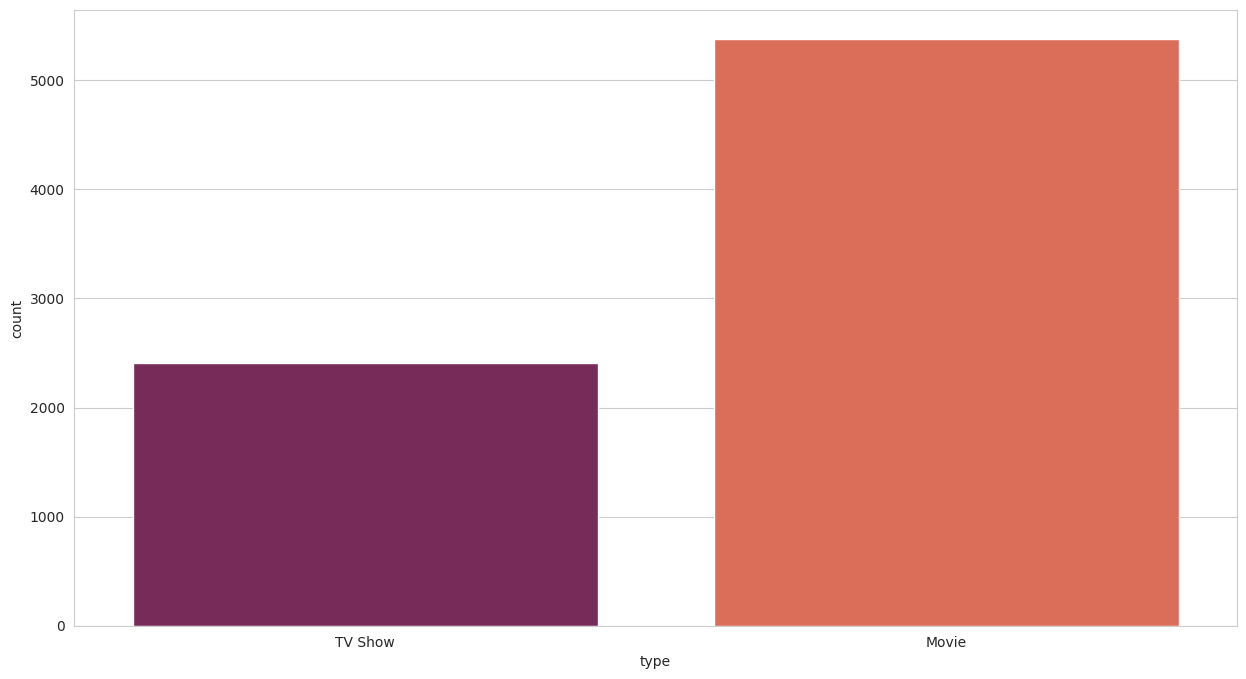

In [131]:
plt.figure(figsize=(15,8))
sns.countplot(x='type',data=df,color="b",palette="rocket")

we can infer  that netflix has more no. of movies than tv shows.

Text(0.5, 1.0, 'distribution of type')

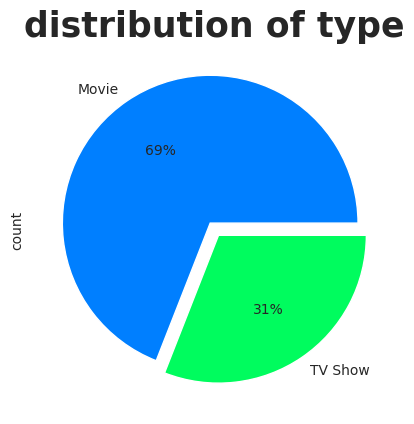

In [132]:
sns.set_palette('gist_ncar')
df.type.value_counts().plot(kind="pie",autopct="%1.0f%%",explode=(0.05,0.05))
plt.title("distribution of type",fontsize=25,fontweight="bold")

In [133]:
#no. of unique points
df.title.nunique()

7787

In [134]:
#word cloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

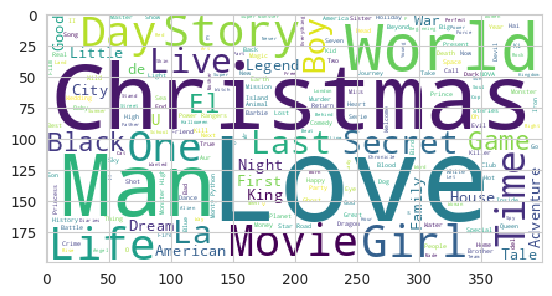

In [135]:
df_wc=df["title"]
text=" ".join(i for i in df_wc)
stopwords=set(STOPWORDS)
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.imshow(wordcloud,interpolation='nearest')
plt.axis="off"
plt.show()

"love","christmas","man","world" seems very common in titles.

most number of content is having christmas.

**DIRECTOR**

In [136]:
df.director.nunique()

4049

In [137]:
df.director

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: object

<Axes: xlabel='count', ylabel='type'>

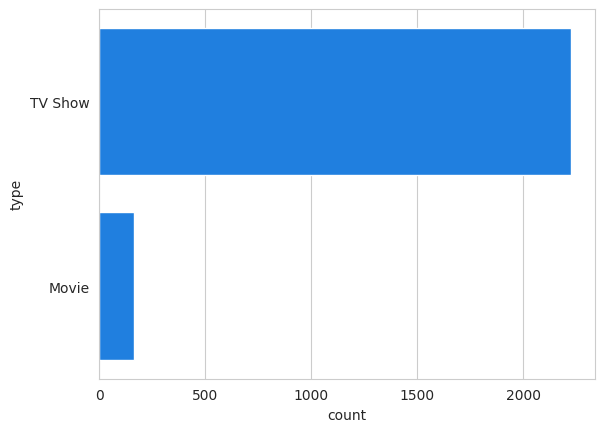

In [138]:
missing_df=df[df['director'].isna()]
sns.countplot(missing_df['type'])

most missing columns of directors are for tv shows.

**Top 10 directors of netflix**

Text(0.5, 1.0, 'top 10 directors of netflix')

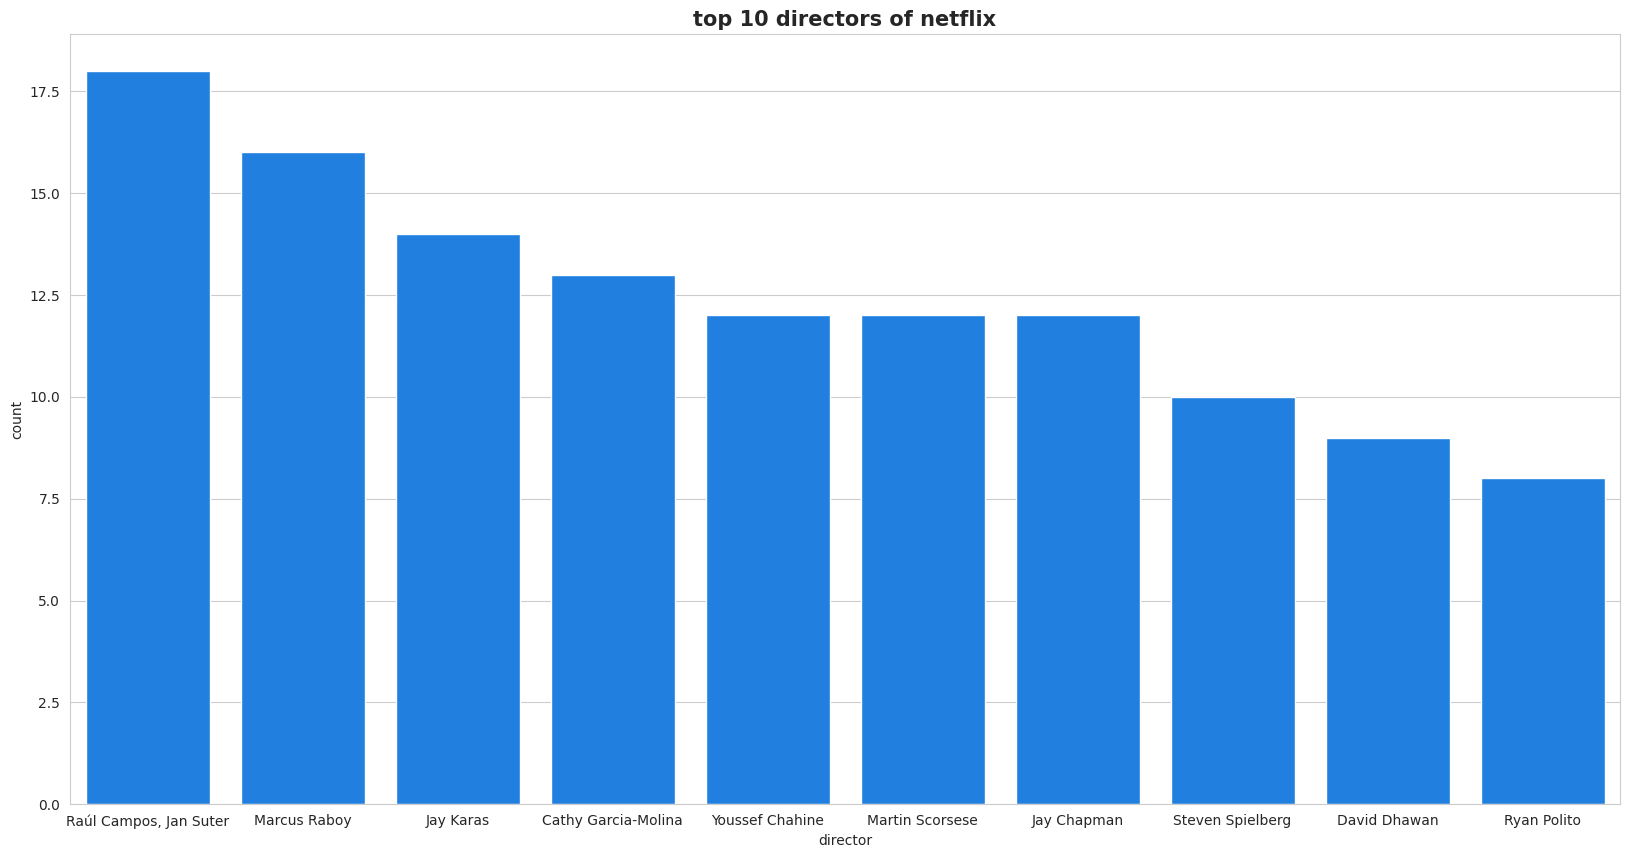

In [139]:
#visualize top 10 directors
plt.figure(figsize=(20,10))
graph=sns.countplot(x='director',data=df,order=df.director.value_counts().head(10).index)
graph.set_title("top 10 directors of netflix",fontsize=15,fontweight="bold")

Raul campos, jan suter combinely best director who directs most movies in netflix.

In [140]:
df['director']=df['director'].fillna('',inplace=True)

**Cast**

In [141]:
df.cast.nunique()

6831

In [142]:
df_actors=df['cast'].fillna('')

In [143]:
df_actors

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                     
Name: cast, Length: 7787, dtype: object

**Top 10 actors on Netflix**

In [144]:
actor = df['cast']


In [145]:
#graph for top 10 actors
actor=df[df.cast != " "].set_index("title").cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)




In [146]:
actor = actor.drop_duplicates()

Text(0.5, 1.0, 'top 10 actors of netflix')

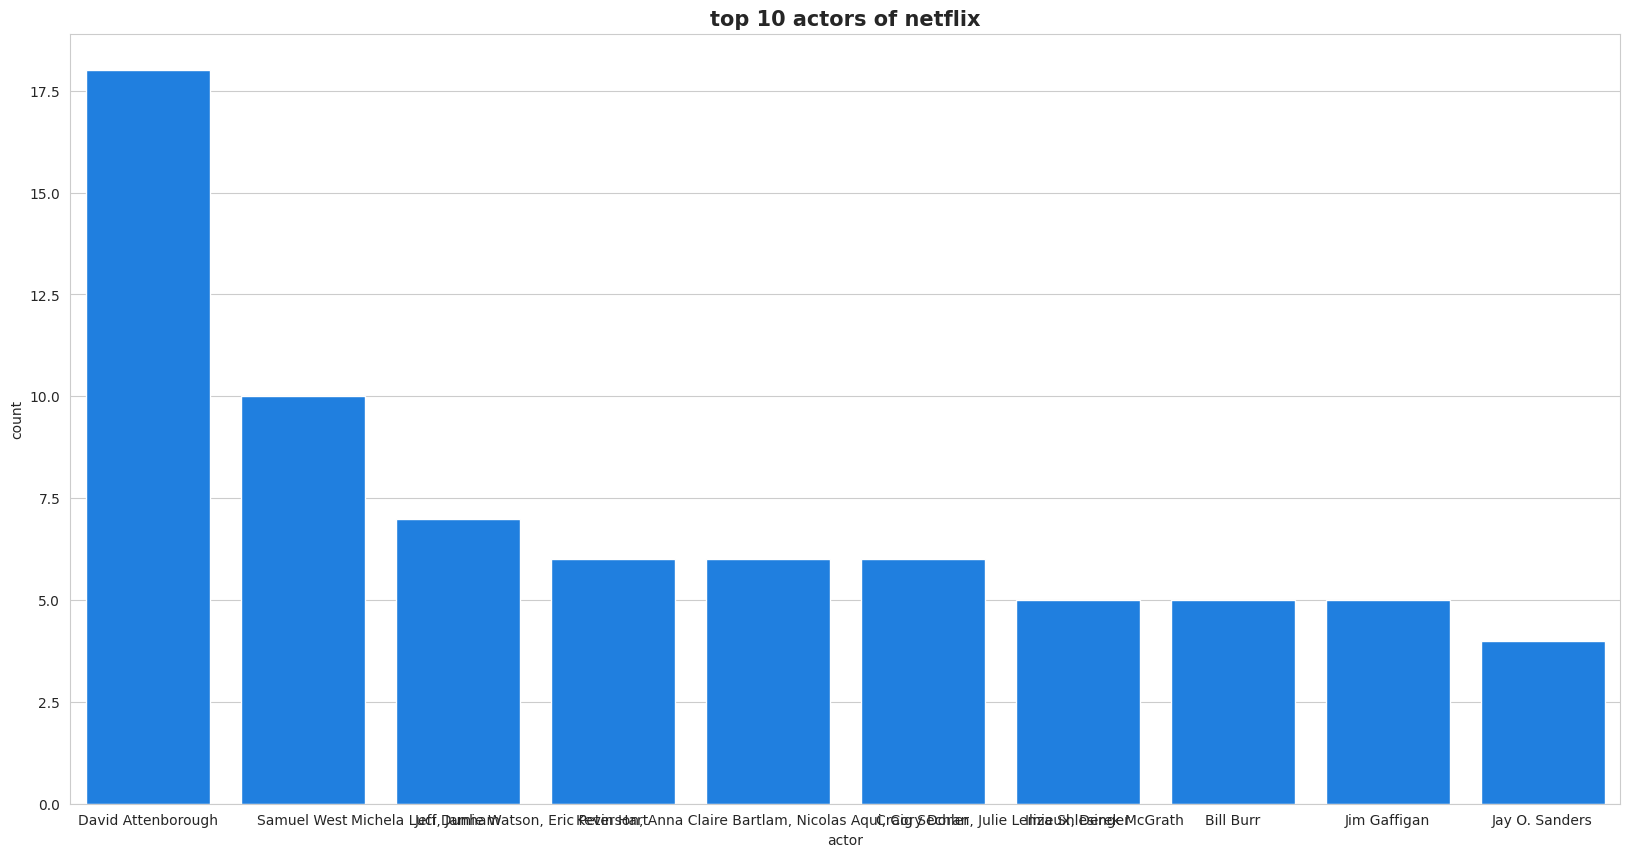

In [147]:
#visualize top 10 actors
plt.figure(figsize=(20,10))
df.rename(columns={'cast': 'actor'}, inplace=True)
graph=sns.countplot(x='actor',data=df,order=df.actor.value_counts().head(10).index)
graph.set_title("top 10 actors of netflix",fontsize=15,fontweight="bold")

David attenborough is the top actor followed by Samuel west michela.

**Country**

In [148]:
df.country.nunique()

681

**Top 10 countries on Netflix**

In [149]:
df['country'].drop_duplicates(inplace=True)

In [150]:
df['country'].duplicated().sum()

7105

Text(0.5, 1.0, 'top 10 countries of netflix')

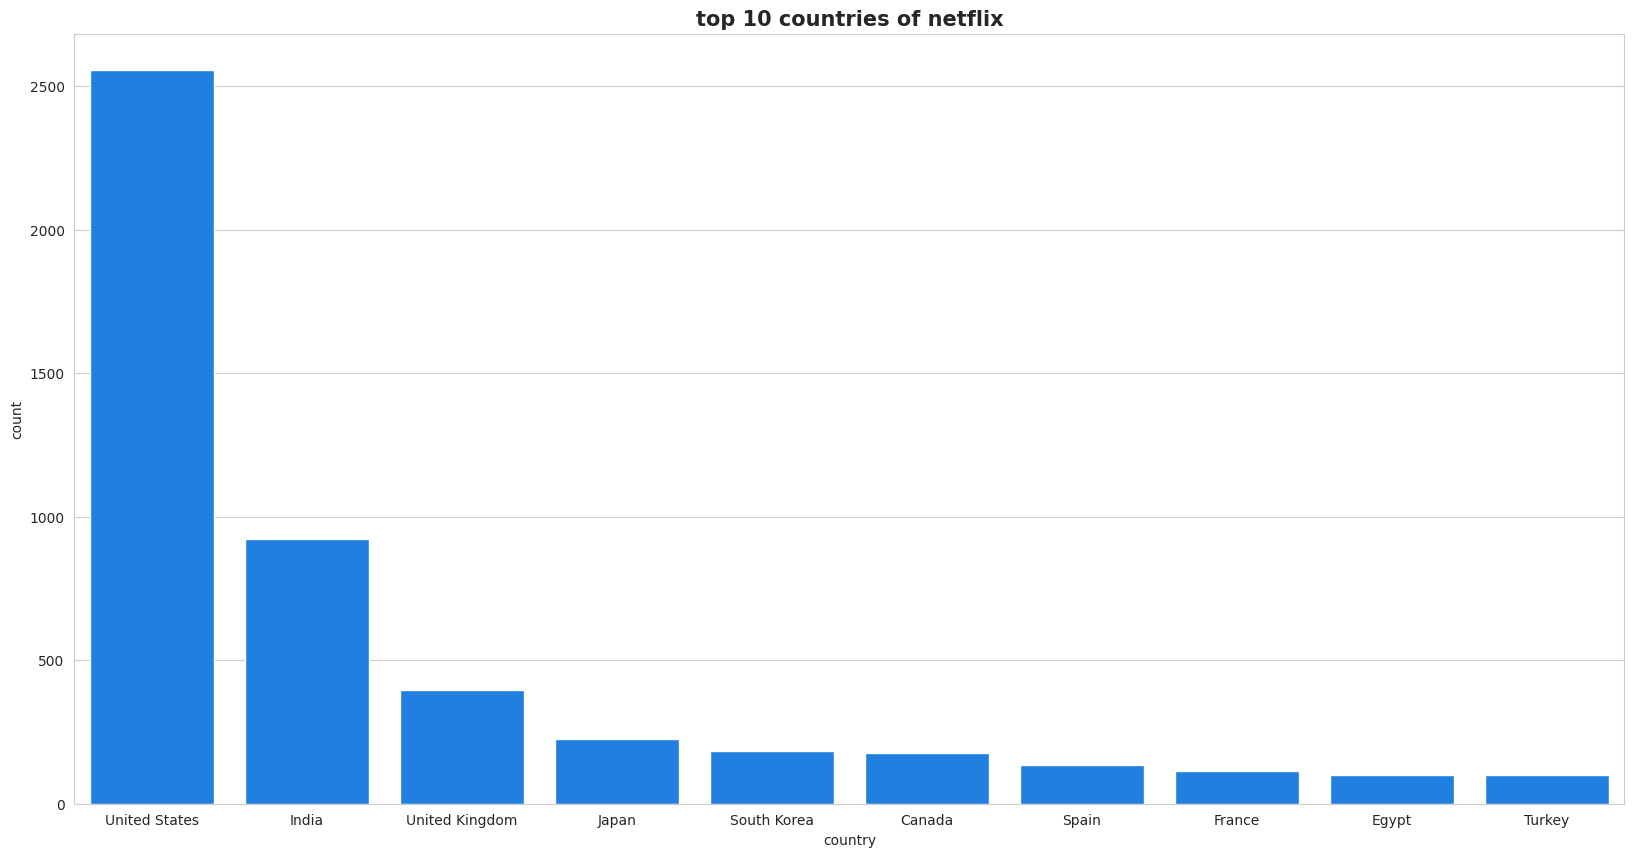

In [151]:
#visualize top 10 countries
plt.figure(figsize=(20,10))
graph=sns.countplot(x='country',data=df,order=df.country.value_counts().head(10).index)
graph.set_title("top 10 countries of netflix",fontsize=15,fontweight="bold")

United state stands out on top since Netflix is an American company.
India comes in second followed by UK.

**Release years**

In [152]:
df.type.value_counts()

type
Movie      5377
TV Show    2410
Name: count, dtype: int64

**Total contents released each year**

In [153]:
yearly_movies=df[df.type=='Movie']['release_year'].value_counts().sort_index(ascending=False).head(10)
yearly_shows=df[df.type=='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(10)
total_contents=df['release_year'].value_counts().sort_index(ascending=False).head(10)

<Axes: xlabel='release_year', ylabel='count'>

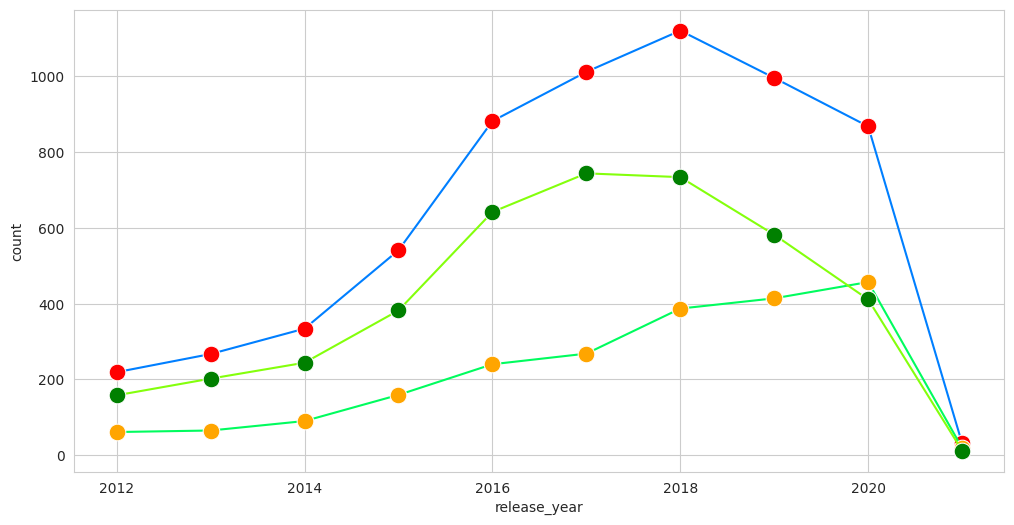

In [154]:
#visualize in graph
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=total_contents, marker='o', markerfacecolor='red', markersize=12)
sns.lineplot(data=yearly_shows, marker='o', markerfacecolor='orange', markersize=12)
sns.lineplot(data=yearly_movies, marker='o', markerfacecolor='green', markersize=12)

We can confirm that Netflix report is true as  we can see no. of tv shows are above triple in 2018.total contents gradually increases after 2015. this may due to internet revolution.

**Rating**

In [155]:
df.rating.nunique()

14

In [156]:
import plotly.express as px
#pie chart
graph=px.pie(df,names='rating',height=500,width=900, hole=0.7,title='Netflix rating distribution')
graph.show()

Most of the programmes in netflix are TV-MA(36.8%) and TV-14(24.8%) rated.
Most of the contents are mature contents.

**Rating distribution by content type**

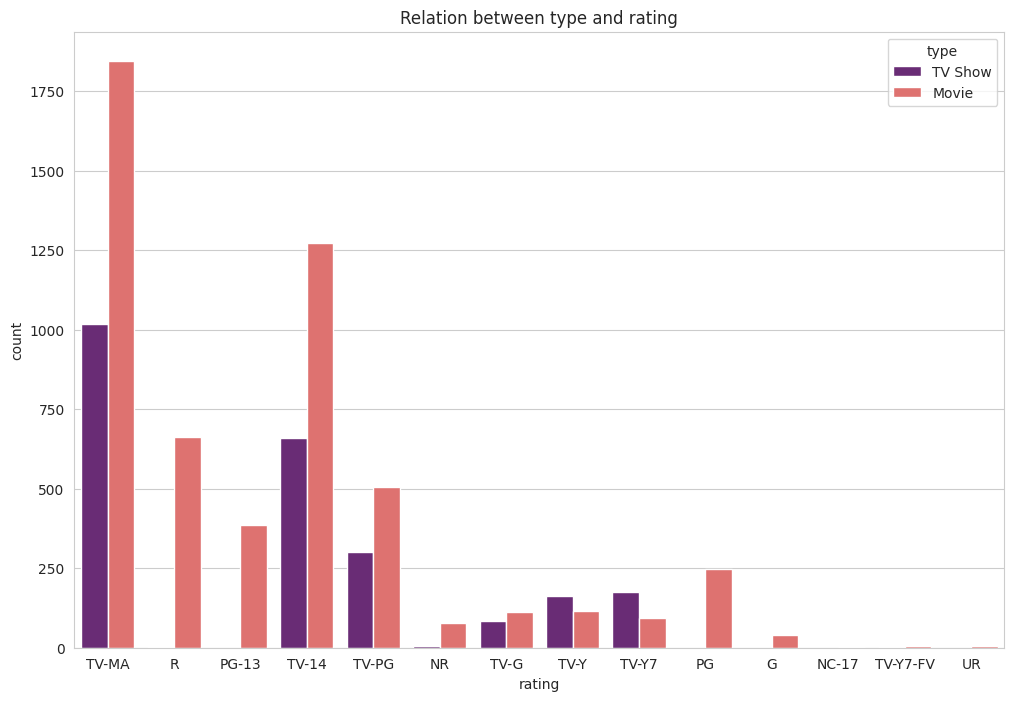

In [157]:
#graph for different rating on movies and tv shows
plt.figure(figsize=(12,8))
sns.countplot(x='rating',hue='type',data=df,palette='magma')
plt.title('Relation between type and rating')
plt.show()

Most of the movies and tv shows have rating of TV-MA(mature audience).
for younger audience there are slightly more tv shows than movies.

**DURATION**

In [193]:
# Get the unique durations and their corresponding counts
durations = list(df['duration'].value_counts().index)
duration_counts = list(df['duration'].value_counts().values)

import plotly.graph_objects as go
# Create a bar chart using plotly graph_objects
fig = go.Figure(data=[go.Bar(
    x=durations,
    y=duration_counts,
    marker_color='#E50914'  # Set the color of the bars
)])

# Update the layout of the figure for better aesthetics
fig.update_layout(
    title='Movie Durations Distribution',  # Set the title of the bar chart
    xaxis_title='Duration',  # Set the title for the x-axis
    yaxis_title='Count',     # Set the title for the y-axis
    plot_bgcolor='rgba(0, 0, 0, 0)',  # Set the background color of the plot
    paper_bgcolor='rgba(0, 0, 0, 0.7)',  # Set the background color of the entire figure
    font=dict(color='white')  # Set the font color to white
)

# Display the figure
fig.show()

**Analyze duration of tv shows**

In [158]:
#Netflix show duration analysis
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Season','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace(' Seasons','')
netflix_tvshows['duration']=netflix_tvshows['duration'].str.replace('s','')
netflix_tvshows['duration']=netflix_tvshows['duration'].astype(str).astype(int)
netflix_tvshows['duration']

0       4
5       1
11      1
12      1
16      1
       ..
7767    1
7775    1
7777    2
7779    1
7785    1
Name: duration, Length: 2410, dtype: int64

<ipython-input-159-9dfbf7987862>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='duration', ylabel='Density'>

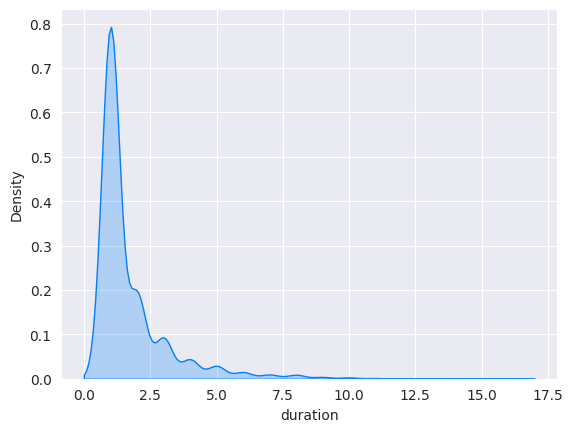

In [159]:
#duration of tv shows
sns.set_style('darkgrid')
sns.kdeplot(data=netflix_tvshows['duration'],shade=True)


Most of the tv shows are 1-2 seasons long.
Very few stretch upto 5 and 8 seasons.

**Creating genres**

In [160]:
genres=df.set_index('title').listed_in.str.split(', ',expand=True).stack().reset_index(level=1,drop=True);
genres

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zulu Man in Japan                                Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 17071, dtype: object

**Top genres on Netflix**

<ipython-input-161-febcefba4c31>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Top 10 genres on Netflix')

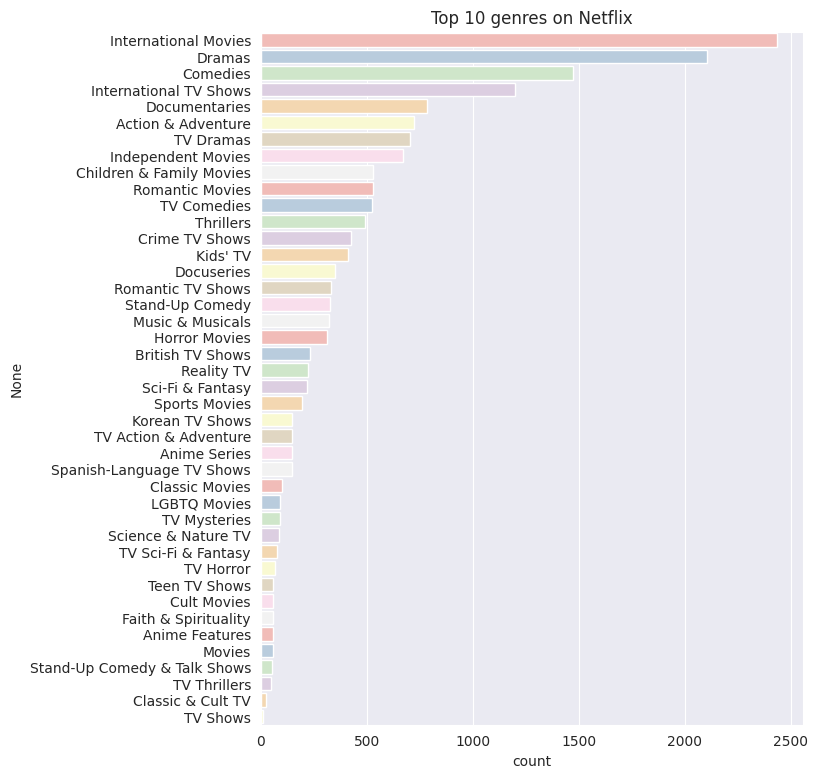

In [161]:
#plotting graph for top 10 genres
plt.figure(figsize=(7,9))
sns.countplot(y=genres,order=genres.value_counts().index,palette='Pastel1')
plt.title('Top 10 genres on Netflix')

we can see International movies, dramas, comedies,International Tv shows are  popualar genres on Netflix.

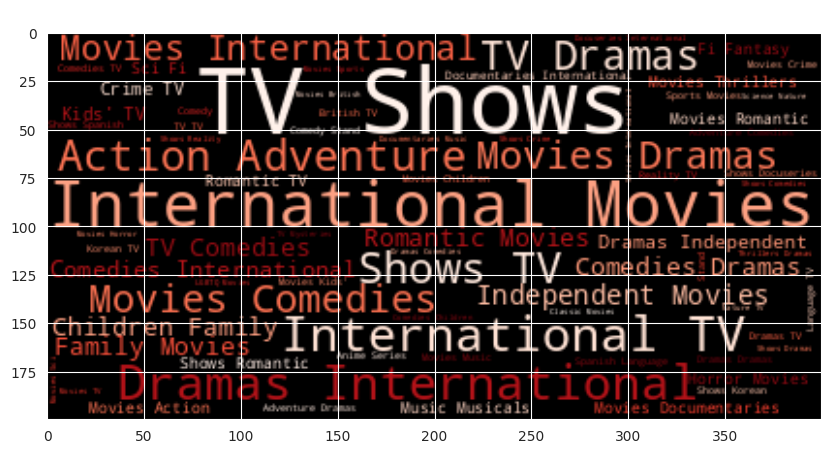

In [162]:
# Get the 'listed_in' values from the Netflix dataset
listed_in_values = df['listed_in'].values

# Concatenate all 'listed_in' values into a single text string
text = ' '.join(listed_in_values)

# Generate a word cloud using the WordCloud class
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Create a plot to display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Netflix Listed Categories', color='white')  # Set the title of the plot
plt.show()

In [163]:
df

,show_id,type,title,director,actor,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,None,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,None,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,None,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,None,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,None,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,None,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,None,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,None,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,None,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


**DESCRIPTION**

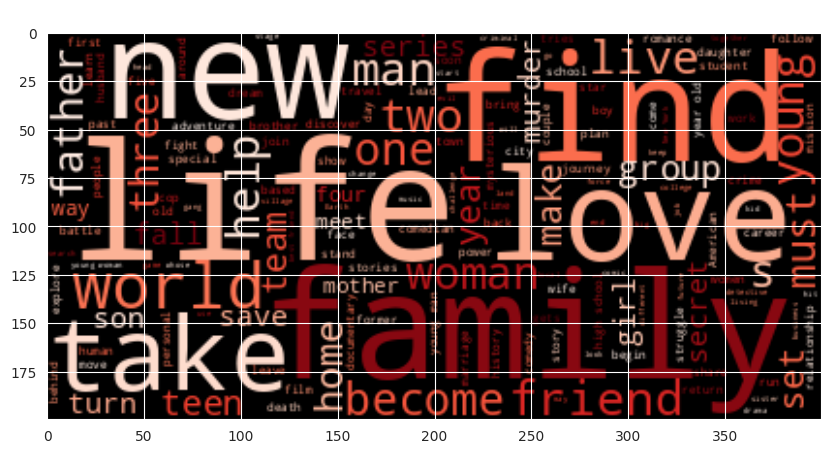

In [196]:
# Get the descriptions from the 'description' column
descriptions = df['description'].values

# Concatenate all descriptions into a single text string
text = ' '.join(descriptions)

# Generate a word cloud using the WordCloud class
wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

# Create a plot to display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Netflix Descriptions', color='white')  # Set the title of the plot
plt.show()

Family, love, life, find are the topmost descriptions.

**FEATURE ENGINEERING**

In [164]:
# Create a new DataFrame 'new_data' with selected columns
new_data = df[['title', 'type', 'director','actor', 'rating', 'listed_in', 'description']]

# Set the 'title' column as the index of the DataFrame
new_data.set_index('title', inplace=True)


In [165]:
import string

class TextCleaner:
    def separate_text(self, texts):
        """
        Separate a comma-separated string into unique lowercase text elements.

        Parameters:
        - texts (str): Comma-separated string of text elements.

        Returns:
        - str: A string with unique, lowercase text elements separated by spaces.
        """
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        """
        Remove spaces from a string and convert it to lowercase.

        Parameters:
        - texts (str): Input string.

        Returns:
        - str: The input string with spaces removed and converted to lowercase.
        """
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        """
        Remove punctuation from a string and convert it to lowercase.

        Parameters:
        - texts (str): Input string.

        Returns:
        - str: The input string with punctuation removed and converted to lowercase.
        """
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        """
        Perform a sequence of text cleaning operations.

        Parameters:
        - texts (str): Input string.

        Returns:
        - str: The cleaned text after applying various cleaning operations.
        """
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [166]:
cleaner = TextCleaner()

In [167]:
new_data['director'] = new_data['director'].apply(lambda x: cleaner.separate_text(x) if pd.notnull(x) else x)

<ipython-input-167-fbfbb38fcfdf>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
# Apply text cleaning methods to specific columns in the new_data DataFrame

# Clean 'type' column by removing spaces
new_data['type'] = new_data['type'].apply(cleaner.remove_space)

# Clean 'director' column by separating and lowercasing text elements
new_data['director'] = new_data['director'].astype('str')
new_data['director'] = new_data['director'].apply(cleaner.separate_text)

# Clean 'cast' column by separating and lowercasing text elements
new_data['actor'] = new_data['actor'].astype('str')
new_data['actor'] = new_data['actor'].apply(cleaner.separate_text)

# Clean 'rating' column by removing spaces (if it's a string)
new_data['rating'] = new_data['rating'].apply(lambda x: cleaner.remove_space(x) if isinstance(x, str) else x)

# Clean 'listed_in' column by separating and lowercasing text elements
new_data['listed_in'] = new_data['listed_in'].apply(cleaner.separate_text)

# Clean 'description' column by removing punctuation
new_data['description'] = new_data['description'].apply(cleaner.remove_punc)

<ipython-input-168-c1795fe45963>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-168-c1795fe45963>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-168-c1795fe45963>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-168-c17

In [169]:
new_data.head()

,type,director,actor,rating,listed_in,description
title,,,,,,
3%,tvshow,none,mel fronckowiak sergio mamberti bianca compara...,tv-ma,tv sci-fi & fantasy international tv shows tv ...,in a future where the elite inhabit an island ...
7:19,movie,none,octavio michel carmen beato demián bichir héct...,tv-ma,dramas international movies,after a devastating earthquake hits mexico cit...
23:59,movie,none,stella chung susan leong benjamin lim josh lai...,r,horror movies international movies,when an army recruit is found dead his fellow ...
9,movie,none,tom kane christopher plummer martin landau eli...,pg-13,independent movies action & adventure sci-fi &...,in a postapocalyptic world ragdoll robots hide...
21,movie,none,jim sturgess jack mcgee josh gad liza lapira k...,pg-13,dramas,a brilliant group of students become cardcount...


In [170]:
# Create a new 'BoW' column by joining non-null values in each row with a space
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis=1)

# Drop all columns except for the 'BoW' column
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

<ipython-input-170-23509f14568b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-170-23509f14568b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:

new_data.head()

,BoW
title,
3%,tvshow none mel fronckowiak sergio mamberti bi...
7:19,movie none octavio michel carmen beato demián ...
23:59,movie none stella chung susan leong benjamin l...
9,movie none tom kane christopher plummer martin...
21,movie none jim sturgess jack mcgee josh gad li...


In [174]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [176]:
# Create an instance of TfidfVectorizer
tfid = TfidfVectorizer()

# Transform the 'BoW' column into a TF-IDF matrix
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [177]:
# Calculate the cosine similarity between rows (documents) in the TF-IDF matrix
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)

# Display the resulting cosine similarity matrix
cosine_sim

array([[1.        , 0.04619616, 0.02501205, ..., 0.02163705, 0.02251235,
        0.02303398],
       [0.04619616, 1.        , 0.01069331, ..., 0.05173565, 0.00550939,
        0.00773083],
       [0.02501205, 0.01069331, 1.        , ..., 0.01125228, 0.00261967,
        0.00990581],
       ...,
       [0.02163705, 0.05173565, 0.01125228, ..., 1.        , 0.01980083,
        0.11723628],
       [0.02251235, 0.00550939, 0.00261967, ..., 0.01980083, 1.        ,
        0.01870337],
       [0.02303398, 0.00773083, 0.00990581, ..., 0.11723628, 0.01870337,
        1.        ]])

In [178]:
cosine_sim

array([[1.        , 0.04619616, 0.02501205, ..., 0.02163705, 0.02251235,
        0.02303398],
       [0.04619616, 1.        , 0.01069331, ..., 0.05173565, 0.00550939,
        0.00773083],
       [0.02501205, 0.01069331, 1.        , ..., 0.01125228, 0.00261967,
        0.00990581],
       ...,
       [0.02163705, 0.05173565, 0.01125228, ..., 1.        , 0.01980083,
        0.11723628],
       [0.02251235, 0.00550939, 0.00261967, ..., 0.01980083, 1.        ,
        0.01870337],
       [0.02303398, 0.00773083, 0.00990581, ..., 0.11723628, 0.01870337,
        1.        ]])

In [179]:
# Save the TF-IDF matrix to a file
np.save('tfidf_matrix.npy', tfid_matrix)

# Save the cosine similarity matrix to a file
np.save('cosine_sim_matrix.npy', cosine_sim)

In [180]:
# Save the TF-IDF vectorizer to a file using pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid, f)

In [183]:
final_data = df[['title', 'type']]

In [184]:
final_data.head()

,title,type
0,3%,TV Show
1,7:19,Movie
2,23:59,Movie
3,9,Movie
4,21,Movie


In [185]:
final_data.to_csv('movie_data.csv',index=False)

In [186]:
import re
class FlixHub:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim

    def recommendation(self, title, total_result=5, threshold=0.5):
        idx = self.find_id(title)
        self.df['similarity'] = self.cosine_sim[idx]
        sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]

        movies = sort_df['title'][sort_df['type'] == 'Movie']
        tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']

        similar_movies = []
        similar_tv_shows = []

        for i, movie in enumerate(movies):
            similar_movies.append('{}. {}'.format(i+1, movie))

        for i, tv_show in enumerate(tv_shows):
            similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

        return similar_movies, similar_tv_shows

    def find_id(self, name):
        for index, string in enumerate(self.df['title']):
            if re.search(name, string):
                return index
        return -1

In [187]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Blood & Water', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Adam: His Song Continues
2. Frank and Cindy
3. Walk Away from Love
4. Mom

Similar TV_show(s) list:
1. Diamond City
2. Kings of Jo'Burg
3. Lion Pride
4. Forget Me Not
5. Horrid Henry
6. Accidentally in Love


In [188]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Chappie', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Last Days of American Crime
2. Real Steel
3. District 9
4. AlphaGo
5. Hardcore Henry
6. 2036 Origin Unknown
7. Singularity
8. Equals
9. HALO Legends

Similar TV_show(s) list:
1. Taken


# Conclusion


The Type of content which with highest number of Distribution is movies.

United states among top countries with highest number of movies.

Raul campos, jan suter combinely best director who directs most movies in netflix.

David attenborough is the top actor followed by Samuel west michela.

Most of the tv shows are 1-2 seasons long.
Very few stretch upto 5 and 8 seasons.


TV-MA have highest rating count.

Most number of movies are released in year 2018.

"love","christmas","man","world" seems very common in titles.

most number of content is having christmas

International movies, dramas, comedies,International Tv shows are popualar genres on Netflix.